In [28]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,label
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,label
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'label'],
      dtype='object')

In [6]:

df.drop(['m_dep',
'pc',
'dual_sim',
'wifi',
'sc_w',
 'blue',
        'three_g',
'n_cores',
'four_g',
'fc',
'int_memory',
      'sc_h',
      'clock_speed',
      'talk_time'


        
        ],axis=1,inplace=True)
scalers=[]

scale_cols=['battery_power',
'mobile_wt',

'px_height',
'px_width',
'ram',
]
from joblib import dump
for i in range(len(scale_cols)):
    m=MinMaxScaler()
    df[scale_cols[i]]=m.fit_transform(df[scale_cols[i]].values.reshape(-1,1))
    dump(m,scale_cols[i]+'Scaler.joblib')
    



In [7]:
df.head()

,battery_power,mobile_wt,px_height,px_width,ram,touch_screen,label
0,0.227789,0.900000,0.010204,0.170895,0.612774,0,1
1,0.347361,0.466667,0.461735,0.993324,0.634687,1,2
2,0.041416,0.541667,0.644388,0.811749,0.627205,1,2
3,0.076152,0.425000,0.620408,0.858478,0.671566,0,2
4,0.881764,0.508333,0.616327,0.475300,0.308658,1,1


In [26]:
# df.drop(['blue','dual_sim','four_g','three_g','touch_screen','wifi'],axis=1,inplace=True)


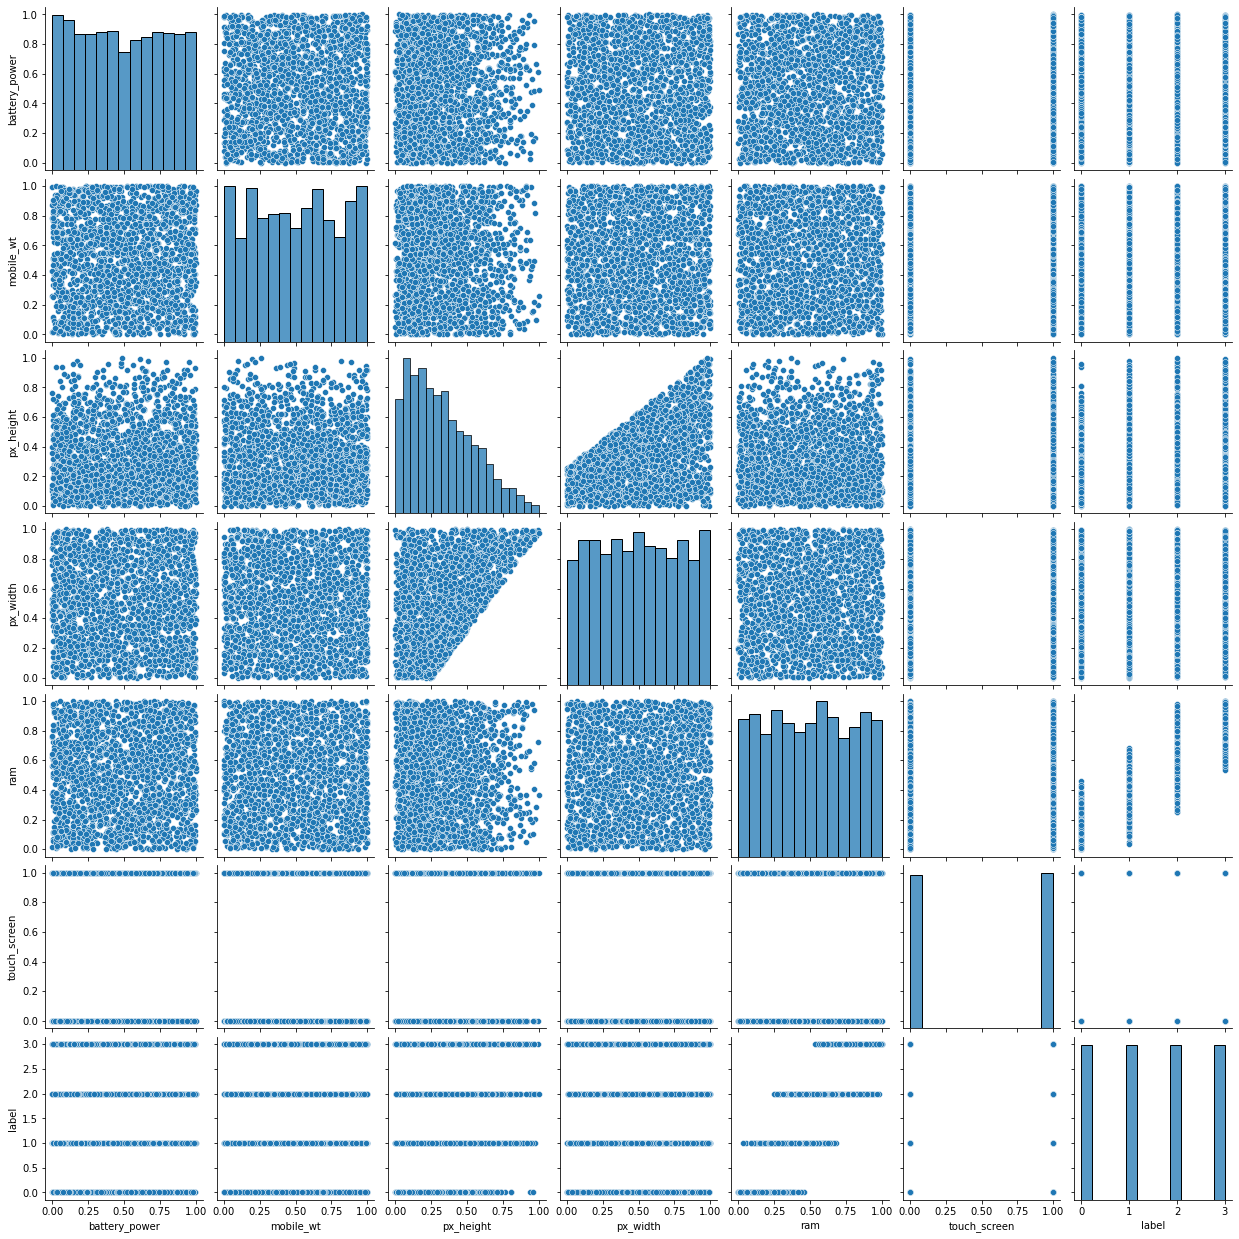

In [29]:
sns.pairplot(df)

In [9]:
df.head()

,battery_power,mobile_wt,px_height,px_width,ram,touch_screen,label
0,0.227789,0.900000,0.010204,0.170895,0.612774,0,1
1,0.347361,0.466667,0.461735,0.993324,0.634687,1,2
2,0.041416,0.541667,0.644388,0.811749,0.627205,1,2
3,0.076152,0.425000,0.620408,0.858478,0.671566,0,2
4,0.881764,0.508333,0.616327,0.475300,0.308658,1,1


In [10]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('label',axis=1),df['label'],test_size=0.33,shuffle=True,)

In [11]:
model=RandomForestClassifier(n_estimators=100)

In [12]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
y_pred=model.predict(X_test)

In [14]:
(np.sum(y_pred==y_test)/len(y_pred))*100

90.75757575757576

In [15]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.6506 ± 0.0245,ram
0.1694 ± 0.0089,battery_power
0.0645 ± 0.0161,px_height
0.0600 ± 0.0121,px_width
-0.0027 ± 0.0035,touch_screen
-0.0061 ± 0.0166,mobile_wt


In [16]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',random_state = 0)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [17]:
y_pred2=svc.predict(X_test)

In [18]:
(np.sum(y_pred2==y_test)/len(y_pred))*100

96.21212121212122

In [19]:
print(confusion_matrix(y_test,y_pred))

[[153  12   0   0]
 [  9 137   4   0]
 [  0  13 156  10]
 [  0   0  13 153]]


In [20]:
print(confusion_matrix(y_test,y_pred2))

[[161   4   0   0]
 [  3 147   0   0]
 [  0   9 164   6]
 [  0   0   3 163]]


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       165
           1       0.85      0.91      0.88       150
           2       0.90      0.87      0.89       179
           3       0.94      0.92      0.93       166

    accuracy                           0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660



In [22]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       165
           1       0.92      0.98      0.95       150
           2       0.98      0.92      0.95       179
           3       0.96      0.98      0.97       166

    accuracy                           0.96       660
   macro avg       0.96      0.96      0.96       660
weighted avg       0.96      0.96      0.96       660



In [23]:
df.columns

Index(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram',
       'touch_screen', 'label'],
      dtype='object')

In [24]:
from joblib import dump, load
dump(svc,'mobilePrice.joblib')

['mobilePrice.joblib']

In [25]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(svc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.7027 ± 0.0199,ram
0.2252 ± 0.0189,battery_power
0.1121 ± 0.0167,px_width
0.1030 ± 0.0147,px_height
0.0188 ± 0.0087,mobile_wt
0.0055 ± 0.0102,touch_screen
